# Using keywords to predict labels

- This method will use the pre-defined keywords in the Q&A dataset to see if it can predict the correct label.

- This method will clean and pre-process the keywords and questions. eg removing stopwords, lowercasing, lemmatization.

- This method will find all the keywords for each specific label and for each new sample it will look at the list and count how many of the words are in the new sample. 





In [1]:
import pandas as pd

#The code below will retrieve the dataset into a pandas dataframe
file="Q&A dataset with label   - 1502-subtopics  with comments  (2).csv"

df=pd.read_csv(file,header=1)

test=df
df["label"].value_counts()

strategy                     275
science&tech                 271
analysis                     164
factual                      146
ethic and reg                 89
ethics & reg                  69
taxonomies                    55
management                    50
Strategy                      14
taxonomy                       9
Ethics & reg                   4
strategic analysis             3
factual, analysis              3
strategy / ethics and reg      2
ethics & reg, analysis         2
analysis | science & tech      2
str                            1
strategy, factual              1
taxonomy, strategy             1
strategy/management            1
strategies                     1
factual,                       1
management/strategy            1
factual/science & tech         1
analysis, strategy             1
factual / analysis             1
Analysis                       1
Factual                        1
Name: label, dtype: int64

The target classes are unbalenced

In [2]:
import warnings
warnings.filterwarnings('ignore')

#The test dataset is all the rows that have nan as keywords
test1=df[df['keywords'].isnull()]

#The code below will change the labels to one specific label. eg different spelling of same label

test1=test1.replace(['Strategy',"strategies"],'strategy')
test1=test1.replace(['ethic and reg','Ethics & reg'],'ethics & reg')

test1=test1.replace('taxonomy','taxonomies')
test1=test1.replace(['Factual','factual,'],'factual')
test1=test1.replace('Analysis','analysis')

# below we will only take the 7 labels, and discard labels that are together eg factual/analysis
# as two labels together have an extremely small sample, which does not contribute much for now

test1=test1[(df["label"] == 'strategy') | (test1["label"] == 'science&tech') | (test1["label"] == 'analysis')
       | (test1["label"] == 'factual') | (test1["label"] == 'taxonomies') | (test1["label"] == 'management')
       | (test1["label"] == 'ethics & reg')]

In [3]:


#The code below will do the same thing as the above cell but for the dataset to generate the keywords for each label


df=df.replace(['Strategy',"strategies"],'strategy')
df=df.replace(['ethic and reg','Ethics & reg'],'ethics & reg')

df=df.replace('taxonomy','taxonomies')
df=df.replace(['Factual','factual,'],'factual')
df=df.replace('Analysis','analysis')

df= df[pd.notnull(df['keywords'])] # Take all the rows with keywords, we will use these pre-defined keywords 
                                   # to generate our keywords for each label

    


df=df[(df["label"] == 'strategy') | (df["label"] == 'science&tech') | (df["label"] == 'analysis') 
       | (df["label"] == 'factual') | (df["label"] == 'taxonomies') | (df["label"] == 'management')
       | (df["label"] == 'ethics & reg')] 

In [4]:
test1["label"].value_counts()

science&tech    210
strategy        117
analysis         68
ethics & reg     67
factual          57
taxonomies       38
management       31
Name: label, dtype: int64

In [5]:
df["label"].value_counts()

strategy        171
analysis         97
ethics & reg     95
factual          90
science&tech     61
taxonomies       26
management       19
Name: label, dtype: int64

In [6]:
df1=df[["keywords","Question","label"]] # these are the main columns we need for this task

In [8]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stop=stopwords.words('english')


# This function will lemmatize the keywords and questions
def lemmatize_words(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word,pos='v') for word in words]
    return ' '.join(words)

#this function takes in the dataframe and pre-processes and cleans the keywords
def preprocess_keywords(df1,column):
  
    df1["clean_"+column]=df1[column].str.lower() #lowercase the words
   
    
    
    #creating a copy of the initial column, splitting word of each row in a list
    df1['col2_'+column] = df1["clean_"+column].str.split()

    #removing stopwords
    df1['col2_'+column] = df1['col2_'+column].apply(lambda x: [i for i in x if i not in stop])

    #joining the list, to get a sentance 
    df1["clean_"+column] = df1['col2_'+column].apply(lambda x: ' '.join(x))
    
    df1=df1.drop(columns=['col2_'+column]) # drop it as we dont need anymore
    
    df1["clean_"+column] = df1["clean_"+column].apply(lemmatize_words) # lemmatize the column
    
    df1["clean_"+column] = df1["clean_"+column].apply(lambda x: re.split('https:\/\/.*', str(x))[0]) # more data cleaning
    
    return df1

In [9]:

#The following function cleans and pre-processes the questions
def preprocess_questions(df1,column):
     # The code below will remove puntuation and clean the column
    df1["clean_"+column] = df1[column].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
    df1["clean_"+column]=df1["clean_"+column].str.replace('[^\w\s]','')
    df1["clean_"+column]=df1["clean_"+column].str.lower() 
   
   
    
    
    #creating a copy of the initial column, splitting word of each row in a list
    df1['col2_'+column] = df1["clean_"+column].str.split()

    #removing stopwords
    df1['col2_'+column] = df1['col2_'+column].apply(lambda x: [i for i in x if i not in stop])

    #joining the list, to get a sentance 
    df1["clean_"+column] = df1['col2_'+column].apply(lambda x: ' '.join(x))
    
    df1=df1.drop(columns=['col2_'+column]) # drop it as we dont need anymore
    
    df1["clean_"+column] = df1["clean_"+column].apply(lemmatize_words) # lemmatize the column
    
    df1["clean_"+column] = df1["clean_"+column].apply(lambda x: re.split('https:\/\/.*', str(x))[0]) # more data cleaning
    
    return df1

In [10]:
clean_df=preprocess_questions(df1,"Question")

In [13]:
clean_df.head(10)

,keywords,Question,label,clean_Question
594,"percentage, programs",What percentage of expected CCM outcomes wasn'...,ethics & reg,percentage expect ccm outcomes wasnt meet gef7...
597,how many,How many people are expected to benefit direct...,analysis,many people expect benefit directly ldcf proje...
598,how much,How much financial support did the LDCF provid...,analysis,much financial support ldcf provide 47 eligibl...
599,"have supported, (probably all past sense?)",What sectors have been supported by the GEF an...,factual,sectors support gef partner ccm investments
600,"percentage, percent",What percentage of LDCF resources were utilize...,analysis,percentage ldcf resources utilize national pro...
601,how many,How many projects were supported by the SCCF a...,analysis,many project support sccf many people expect b...
602,successfully,Did the LDCF fail to serve all of the eligible...,strategy,ldcf fail serve eligible least develop countries
603,policies,What results will SCCF projects be expected to...,ethics & reg,result sccf project expect provide upon comple...
604,reporting period,Will support for climate change mitigation in ...,ethics & reg,support climate change mitigation report perio...
605,"percent , $.",What percentage of the available $470 million ...,analysis,percentage available 470 million ldcf resource...


In [14]:
test1=preprocess_questions(test1,"Question") # We will also pre-process and clean the test dataset

test1[["Question","clean_Question"]]

,Question,clean_Question
0,What is the goal of the Paris Agreement?,goal paris agreement
1,. What is the role of AFOLU sector in achievin...,role afolu sector achieve global ghg neutrality
2,How much can AFOLU contribute to a 1.5C pathwa...,much afolu contribute 15c pathway 2050
5,What are some signs that terrestrial carbon si...,sign terrestrial carbon sink near limit due in...
6,Can BECCS be deployed sustainably on a large s...,beccs deploy sustainably large scale
...,...,...
618,What are adolescent's reasons for not taking m...,adolescents reason take direct environmental a...
619,What have previous studies reported about youn...,previous study report young people feel regard...
621,How does the environment affect young people's...,environment affect young people wellbeing
622,How does greenspace affect young people's well...,greenspace affect young people wellbeing


In [15]:
clean_df1=preprocess_keywords(clean_df,"keywords") # pre-process the keyword column, with some data cleaning
                                                   

In [16]:
clean_df1.tail(10)

,keywords,Question,label,clean_Question,clean_keywords
1168,moratorium,When did Indonesia announce its moratorium on ...,ethics & reg,indonesia announce moratorium issuance carbon ...,moratorium
1169,moratoria,What consequences could arise due imposing mor...,ethics & reg,consequences could arise due impose moratoria ...,moratoria
1170,"laws, moratoria,",What role do laws play with regard moratoria a...,ethics & reg,role laws play regard moratoria ban affect int...,"laws, moratoria,"
1171,VCS standards e,Does the VCS Standard provide for any benefit-...,ethics & reg,vcs standard provide benefitsharing obligation...,vcs standards e
1172,Biodiversity standards,"How does Verras Climate, Community and Biodive...",ethics & reg,verras climate community biodiversity standard...,biodiversity standards
1173,regulated frameworkse,Are developing countries able to monetize Pari...,ethics & reg,develop countries able monetize paris mechanis...,regulate frameworkse
1174,COP27,What was announced at COP27 related to African...,ethics & reg,announce cop27 relate african nations increase...,cop27
1175,sovereign credits,"How did Gabon become eligiblefor ""sovereign cr...",ethics & reg,gabon become eligiblefor sovereign credit redd,sovereign credit
1176,jurisdictions,What other jurisdictions are expected to be fo...,ethics & reg,jurisdictions expect follow gabon respect issu...,jurisdictions
1177,Potential concern,What is the potential concern surrounding the ...,strategy,potential concern surround availability carbon...,potential concern


Comparison of clean questions and clean keywords with their originals

In [17]:
def comma_removal(text):
    return text.rstrip(',')
def space_removal(text):
    return text.rstrip()

# below is more data cleaning for keywords
clean_df1["clean_keywords"]=clean_df1["clean_keywords"].str.rstrip() # This will remove unnecessary space at end of keywords
clean_df1["clean_keywords"]=clean_df1["clean_keywords"].str.rstrip(",.")# This will remove commas as end of keywords

In [18]:
clean_df1.head(2)

,keywords,Question,label,clean_Question,clean_keywords
594,"percentage, programs",What percentage of expected CCM outcomes wasn'...,ethics & reg,percentage expect ccm outcomes wasnt meet gef7...,"percentage, program"
597,how many,How many people are expected to benefit direct...,analysis,many people expect benefit directly ldcf proje...,many


In [19]:
clean_df1[clean_df1['clean_keywords'].astype(str).str.contains(",|\+")] # the + and comma seperates keywords
                                                                    

,keywords,Question,label,clean_Question,clean_keywords
594,"percentage, programs",What percentage of expected CCM outcomes wasn'...,ethics & reg,percentage expect ccm outcomes wasnt meet gef7...,"percentage, program"
599,"have supported, (probably all past sense?)",What sectors have been supported by the GEF an...,factual,sectors support gef partner ccm investments,"supported, (probably past sense?)"
600,"percentage, percent",What percentage of LDCF resources were utilize...,analysis,percentage ldcf resources utilize national pro...,"percentage, percent"
605,"percent , $.",What percentage of the available $470 million ...,analysis,percentage available 470 million ldcf resource...,"percent , $"
623,"aspects, found,suggests",What aspects of the environment were found to ...,analysis,aspects environment find positive effect young...,"aspects, found,suggests"
...,...,...,...,...,...
1158,"moratorium, UNFCCC,",What explanation was given for Honduras' morat...,ethics & reg,explanation give honduras moratorium sale volu...,"moratorium, unfccc"
1161,climate goals+ban,Which countries announced their ban on firms f...,ethics & reg,countries announce ban firm export carbon cred...,climate goals+ban
1163,RMP +moratoria,In what way is publishing RMP related with mor...,ethics & reg,way publish rmp relate moratoria issuance trad...,rmp +moratoria
1166,full ban+inernational trading,Was India intending to impose a full ban on in...,ethics & reg,india intend impose full ban international tra...,full ban+inernational trade


In [20]:
clean_df1["clean_keys"]=clean_df1['clean_keywords'].str.replace('[^\w\s]','--') # This replaces + and , with --
                                                                                # this is done so we can seperate keywords
                                                                                # and join them 

In [21]:
# the code below uses the above -- sign to seperate each keyword into a list,
# this makes it easy to seperate each keyword
clean_df1['clean_keywords_final'] = clean_df1["clean_keys"].apply(lambda x: x[0:].split('--')) 

In [22]:
clean_df1[["Question","keywords","clean_keywords_final","label"]].head(2)

,Question,keywords,clean_keywords_final,label
594,What percentage of expected CCM outcomes wasn'...,"percentage, programs","[percentage, program]",ethics & reg
597,How many people are expected to benefit direct...,how many,[many],analysis


The keywords are now seperated into a list

In [50]:
final_df=clean_df1[["clean_keywords_final","clean_Question","label"]] # this is the final dataset we will use to
                                                                      # to build our keyword generation model

In [26]:
final_df.head(2)

,clean_keywords_final,clean_Question,label
594,"[percentage, program]",percentage expect ccm outcomes wasnt meet gef7...,ethics & reg
597,[many],many people expect benefit directly ldcf proje...,analysis


In [27]:
# The code below will seperate each label. this is needed so we can generate keywords for each label 

strategy=final_df[(final_df["label"] == 'strategy')]

science_tech=final_df[(final_df["label"] == 'science&tech')]

analysis=final_df[(final_df["label"] == 'analysis')]

factual=final_df[(final_df["label"] == 'factual')]

taxonomies=final_df[(final_df["label"] == 'taxonomies')]

management=final_df[(final_df["label"] == 'management')]

ethics_reg=final_df[(final_df["label"] == 'ethics & reg')]

In [28]:
# the code below takes each labels keywords and joins them together

str_words = list(strategy['clean_keywords_final'])
sci_words = list(science_tech['clean_keywords_final'])
ana_words = list(analysis['clean_keywords_final'])
fac_words = list(factual['clean_keywords_final'])
tax_words = list(taxonomies['clean_keywords_final'])
man_words = list(management['clean_keywords_final'])
eth_words = list(ethics_reg['clean_keywords_final'])

In [29]:
# this flattens the list as some keywords are in a list of list for each label

str_words_flat = [item for sublist in str_words for item in sublist]
sci_words_flat = [item for sublist in sci_words for item in sublist]
ana_words_flat = [item for sublist in ana_words for item in sublist]
fac_words_flat = [item for sublist in fac_words for item in sublist]
tax_words_flat = [item for sublist in tax_words for item in sublist]
man_words_flat = [item for sublist in man_words for item in sublist]
eth_words_flat = [item for sublist in eth_words for item in sublist]

str_words_flat # total list of words for strategy example

['successfully',
 'think',
 'strategy',
 '',
 'ways',
 'challenge',
 'principally drive',
 'attitudes',
 '',
 'can',
 'would',
 'method',
 ' investigate',
 'benefit',
 'can',
 'can',
 'plan',
 '',
 'outcomes',
 ' benefit',
 'because',
 ' beneficial',
 'can',
 '',
 'happen',
 'can',
 'advantage',
 'purpose',
 'challenge',
 'beenfits',
 'can',
 'possible',
 'strategy',
 'involve',
 'can',
 ' benefit',
 '',
 '',
 'kind',
 'goal',
 '',
 'how',
 'technology',
 'success',
 '',
 'challenge',
 'strategy',
 'action',
 '',
 '',
 'type',
 'effect',
 '',
 'governance',
 'ways',
 'important',
 '',
 '',
 'activities',
 'could',
 'what',
 'purpose',
 '',
 'help',
 '',
 'kind',
 'are',
 'benefits',
 '',
 'measures',
 '',
 '',
 '',
 'challenge',
 'require',
 'strategy',
 'research',
 'findings',
 'benefits',
 'yes',
 'trend',
 '',
 'advantage',
 '',
 'what',
 'impact',
 '',
 'type',
 'benefit',
 '',
 '',
 'type',
 'needed',
 'is require',
 '',
 'help',
 '',
 'achieve',
 '',
 'strategy',
 'strategy',
 '

Above is all the words for strategy label. We will do this for each label. We can do further cleaning such as removing words that have spaces only but this does not affect our generation model. If the method works then further cleaning will be done.

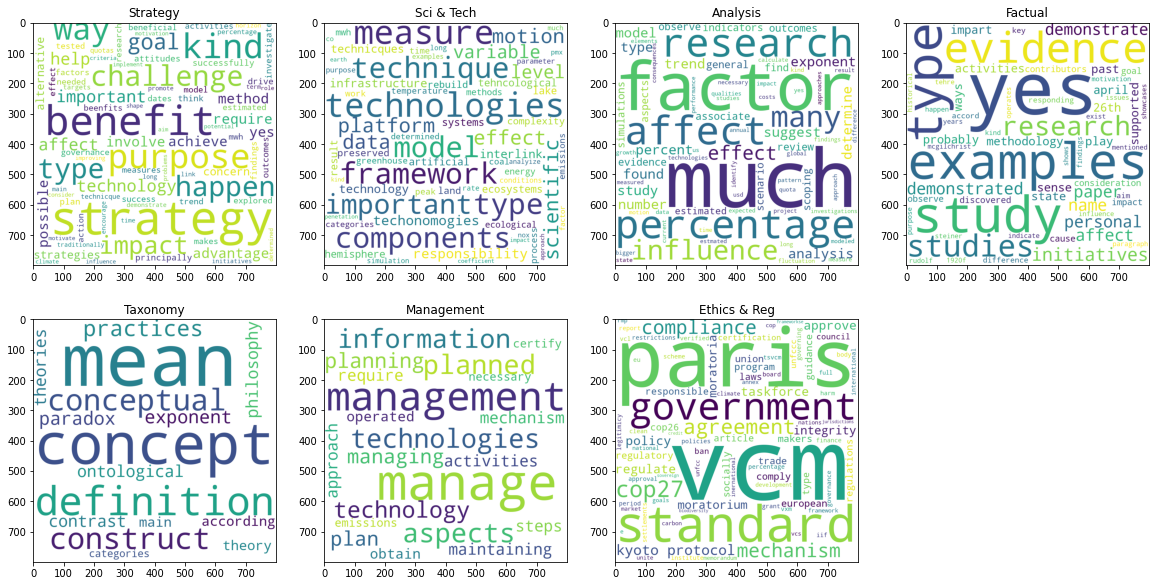

In [77]:
#The code below will generate wordclouds for all keywords visually

wordcloud1 = WordCloud(width=800, height=800, background_color='white').generate((" ").join(str_words_flat))
wordcloud2 = WordCloud(width=800, height=800, background_color='white').generate((" ").join(sci_words_flat))
wordcloud3 = WordCloud(width=800, height=800, background_color='white').generate((" ").join(ana_words_flat))
wordcloud4 = WordCloud(width=800, height=800, background_color='white').generate((" ").join(fac_words_flat))
wordcloud5 = WordCloud(width=800, height=800, background_color='white').generate((" ").join(tax_words_flat))
wordcloud6 = WordCloud(width=800, height=800, background_color='white').generate((" ").join(man_words_flat))
wordcloud7 = WordCloud(width=800, height=800, background_color='white').generate((" ").join(eth_words_flat))


fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# add word clouds to subplots
axs[0, 0].imshow(wordcloud1)
axs[0, 0].set_title('Strategy')
axs[0, 1].imshow(wordcloud2)
axs[0, 1].set_title('Sci & Tech')
axs[0, 2].imshow(wordcloud3)
axs[0, 2].set_title('Analysis')
axs[0, 3].imshow(wordcloud4)
axs[0, 3].set_title('Factual')
axs[1, 0].imshow(wordcloud5)
axs[1, 0].set_title('Taxonomy')
axs[1, 1].imshow(wordcloud6)
axs[1, 1].set_title('Management')
axs[1, 2].imshow(wordcloud7)
axs[1, 2].set_title('Ethics & Reg')

# remove empty subplot
fig.delaxes(axs[1, 3])

# display the figure
plt.show()







Above are the wordclouds for all labels 

In [69]:
#The code below will go through each sample of the test dataset and look at how many of the keywords
#for that label occured, in this case it is strategy

lis=[]
for x in test1["Question"]:
    c=0
    print("-------")
    print(x)
    print("-----")
    for y in set(str_words_flat):
        if y in x:
            
         
            print(y)
            print("---")
            c+=1
    lis.append(c-1)
    print("count ", c-1)
        #print(c)
        

-------
What is the goal of the Paris Agreement?
-----

---
goal
---
count  1
-------
. What is the role of AFOLU sector in achieving global GHG neutrality?
-----

---
role
---
count  1
-------
How much can AFOLU contribute to a 1.5C pathway until 2050?
-----

---
way
---
can
---
count  2
-------
What are some signs that terrestrial carbon sinks are nearing their limit due to increased CO2 atmospheric fertilization?
-----

---
are
---
count  1
-------
Can BECCS be deployed sustainably on a large scale?
-----

---
count  0
-------
Does increasing climate change impacts risk cause reversal from Carbon Sink?
-----

---
impact
---
count  1
-------
How was the land use sectors considered in climate discussions during the leadup to the Paris Agreement?
-----

---
consider
---
count  1
-------
What is an example of how these conversations have been implemented on-the-ground?
-----

---
how
---
count  1
-------
How did this regulation address challenges from Kyoto Protocol?
-----

---
challeng

---
ways
---
count  3
-------
What is the process of converting future costs to their present value equivalents?
-----

---
count  0
-------
How should one distinguish between discount rate and rate of inflation?
-----

---
count  0
-------
Are lifecycle cost estimations computed or estimated?
-----

---
estimated
---
count  1
-------
Are lifecycle cost estimations computed or estimated?
-----

---
estimated
---
count  1
-------
Are lifecycle cost estimations computed or estimated?
-----

---
estimated
---
count  1
-------
What two parts can study period for LCC usually be divided into?
-----

---
can
---
count  1
-------
What is the planning-construction period?
-----

---
plan
---
count  1
-------
What does base date refer to?
-----

---
count  0
-------
What is included in OM&R costs?
-----

---
count  0
-------
How can one determine investment routine and habits of an investor?
-----

---
term
---
can
---
count  2
-------
How many periods are considered when estimating LCC?
-----



count  4
-------
What kind of emotional response do adolescents show when discussing environmental issues?
-----

---
kind
---
how
---
count  2
-------
What are adolescent's reasons for not taking more direct environmental action?
-----

---
are
---
action
---
count  2
-------
What have previous studies reported about young people's feelings regarding their ability to have a real impact on environmental issues?
-----

---
impact
---
count  1
-------
How does the environment affect young people's wellbeing?
-----

---
affect
---
count  1
-------
How does greenspace affect young people's wellbeing?
-----

---
affect
---
count  1
-------
What are big data technologies enabling?
-----

---
are
---
count  1


The above loop prints the sample, and the keywords that occured in that sample with the total count.

In [31]:
test1["strategy"]=lis # create keyword count for strategy and attach as dataframe

test1.head(2)

,keywords,label,Question,Answer,topic,subtopic,topic.1,subtopic.1,Unnamed: 8,clean_Question,strategy
0,NaN,ethics & reg,What is the goal of the Paris Agreement?,The goal of the Paris Agreement is to limit th...,decarbonization,['emissions' 'carbon'],decarbonization,['Environmental Sustainability' 'Climate Policy'],NaN,goal paris agreement,1
1,NaN,strategy,. What is the role of AFOLU sector in achievin...,The Paris Agreement anchors the central and un...,decarbonization,['emissions' 'carbon' 'renewables'],decarbonization,['Environmental Sustainability' 'Climate Polic...,NaN,role afolu sector achieve global ghg neutrality,1


In [32]:
#do same as above but for science and tech 


lis1=[]

for x in test1["Question"]:
    c=0
   # print("-------")
   # print(x)
   # print("-----")
    for y in set(sci_words_flat):
        if y in x:
            
         
          #  print(y)
          #  print("---")
            c+=1
    lis1.append(c-1)
    #print("count ", c-1)

In [33]:
test1["science&tech"]=lis1



In [34]:
#do same as above but for analysis

lis2=[]
for x in test1["Question"]:
    c=0
   # print("-------")
  #  print(x)
   # print("-----")
    for y in set(ana_words_flat):
        if y in x:
            
         
           # print(y)
          #  print("---")
            c+=1
    lis2.append(c-1)
    #print("count ", c-1)

In [35]:
test1["analysis"]=lis2

In [36]:
#do same as above but for factual 
lis3=[]
for x in test1["Question"]:
    c=0
   # print("-------")
  #  print(x)
  #  print("-----")
    for y in set(fac_words_flat):
        if y in x:
            
         
          #  print(y)
          #  print("---")
            c+=1
    lis3.append(c-1)
    #print("count ", c-1)

In [37]:
test1["factual"]=lis3

In [38]:
#do same as above but for taxonomies
lis4=[]
for x in test1["Question"]:
    c=0
   # print("-------")
   # print(x)
    #print("-----")
    for y in set(tax_words_flat):
        if y in x:
            
         
            #print(y)
          #  print("---")
            c+=1
    lis4.append(c-1)
    #print("count ", c-1)

In [39]:
test1["taxonomies"]=lis4

In [40]:
#do same as above but for management
lis5=[]
for x in test1["Question"]:
    c=0
    #print("-------")
   # print(x)
   # print("-----")
    for y in set(man_words_flat):
        if y in x:
            
         
         #   print(y)
         #   print("---")
            c+=1
    lis5.append(c-1)
   # print("count ", c-1)

In [41]:
test1["management"]=lis5

In [42]:
#do same as above but for ethics and reg
lis6=[]
for x in test1["Question"]:
    c=0
    #print("-------")
   # print(x)
   # print("-----")
    for y in set(eth_words_flat):
        if y in x:
            
         
          #  print(y)
           # print("---")
            c+=1
    lis6.append(c)
    #print("count ", c)

In [43]:
test1["ethics & reg"]=lis6

In [44]:
test1[["label","strategy","science&tech","analysis",'factual',
      "taxonomies","management","ethics & reg"]].head(40)

,label,strategy,science&tech,analysis,factual,taxonomies,management,ethics & reg
0,ethics & reg,1,1,2,3,1,0,0
1,strategy,1,1,2,2,1,0,1
2,analysis,2,3,4,1,0,0,0
5,science&tech,1,1,1,2,0,0,0
6,science&tech,0,1,2,1,0,0,0
7,science&tech,1,1,4,4,1,0,0
8,factual,1,3,3,3,1,0,0
9,factual,1,3,4,3,2,1,0
10,ethics & reg,1,2,2,2,1,0,0
11,ethics & reg,0,1,3,2,1,0,0


Above is the word count for each label for each sample. The label with the highest word count will be taken as the prediction

In [45]:
#The code below takes the higest word count value and outputs the column name as the predicted label

test1["predicted_label_final"]=test1[["strategy","science&tech","analysis",'factual',
      "taxonomies","management","ethics & reg"]].astype(float).idxmax(axis=1) 

In [46]:
test1[["label","predicted_label_final"]] # actual label vs predicted one based on highest word count



,label,predicted_label_final
0,ethics & reg,factual
1,strategy,analysis
2,analysis,analysis
5,science&tech,factual
6,science&tech,analysis
...,...,...
618,analysis,factual
619,analysis,analysis
621,strategy,factual
622,analysis,factual


In [47]:
test1.groupby(["label", "predicted_label_final"]).size().reset_index(name="Count") # Show label compared to predicted
                                                                                   # and the frequency

,label,predicted_label_final,Count
0,analysis,analysis,37
1,analysis,factual,9
2,analysis,science&tech,18
3,analysis,strategy,4
4,ethics & reg,analysis,12
5,ethics & reg,ethics & reg,2
6,ethics & reg,factual,24
7,ethics & reg,science&tech,23
8,ethics & reg,strategy,6
9,factual,analysis,12


Each label is compared to its predicted value. We can see that it is quite random and accuracy is low.

In [48]:
pd.crosstab(test1.label, test1.predicted_label_final,normalize='index')

predicted_label_final,analysis,ethics & reg,factual,management,science&tech,strategy,taxonomies
label,,,,,,,
analysis,0.544118,0.000000,0.132353,0.000000,0.264706,0.058824,0.000000
ethics & reg,0.179104,0.029851,0.358209,0.000000,0.343284,0.089552,0.000000
factual,0.210526,0.000000,0.280702,0.017544,0.438596,0.052632,0.000000
management,0.419355,0.000000,0.161290,0.032258,0.161290,0.225806,0.000000
science&tech,0.285714,0.000000,0.185714,0.000000,0.419048,0.109524,0.000000
strategy,0.299145,0.008547,0.196581,0.000000,0.307692,0.188034,0.000000
taxonomies,0.447368,0.000000,0.131579,0.000000,0.315789,0.078947,0.026316


This a confusion matrix comparing true versus predicted in percentages. Analysis is the only one that has accuracy of over 50% but is still poor. The overall accuracy of all is bad for now. The diagnols shows the accuracy for each label with its predicted. Furthemore, science and tech, analysis and factial keywords words seem to be general to all labels more. However, with more data and keywords this approach can be revisted.

In [49]:
print("Final Accuracy - ",len(test1.loc[test1.label == test1.predicted_label_final])/len(test1))

Final Accuracy -  0.28401360544217685


## The final accuracy is very low. This shows that the pre-defined keywords are not a good measure of predicting labels for now. However with more data and keywords, this approach can be revisted to see if that improves it.

# Next Steps

- Generate better keywords
- Get larger dataset
- Use keyword extraction model to extract most significant words for each label
- Use unsupervised learning to cluster similar labels together